Documentation: Analyzing IMDb Top 1000 Movies

This documentation provides a brief overview of how to analyze the IMDb Top 1000 movies dataset using pandas and matplotlib.


This code snippet is aimed at analyzing the IMDb Top 1000 movies dataset. It begins by importing the necessary libraries, namely pandas and matplotlib.pyplot. The dataset is then loaded using the pandas library, and the column names are extracted for further analysis. The average rating of the movies is calculated by taking the mean of the "IMDB_Rating" column. The code proceeds to explore the genres of the movies by splitting the "Genre" column and extracting unique genres. Finally, a histogram is generated to visualize the distribution of genres in the dataset.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./imdb_top_1000.csv")

columns = df.columns.tolist()

average_rating = df["IMDB_Rating"].mean()
all_genres = df['Genre'].str.split(', ').explode()
unique_genre = all_genres.unique()
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [3]:
genre_counts = all_genres.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
output_file = 'genre_counts.csv'
genre_counts.to_csv(output_file, index=False)
result = pd.read_csv("./genre_counts.csv")
result

,Genre,Count
0,Drama,724
1,Comedy,233
2,Crime,209
3,Adventure,196
4,Action,189
5,Thriller,137
6,Romance,125
7,Biography,109
8,Mystery,99
9,Animation,82


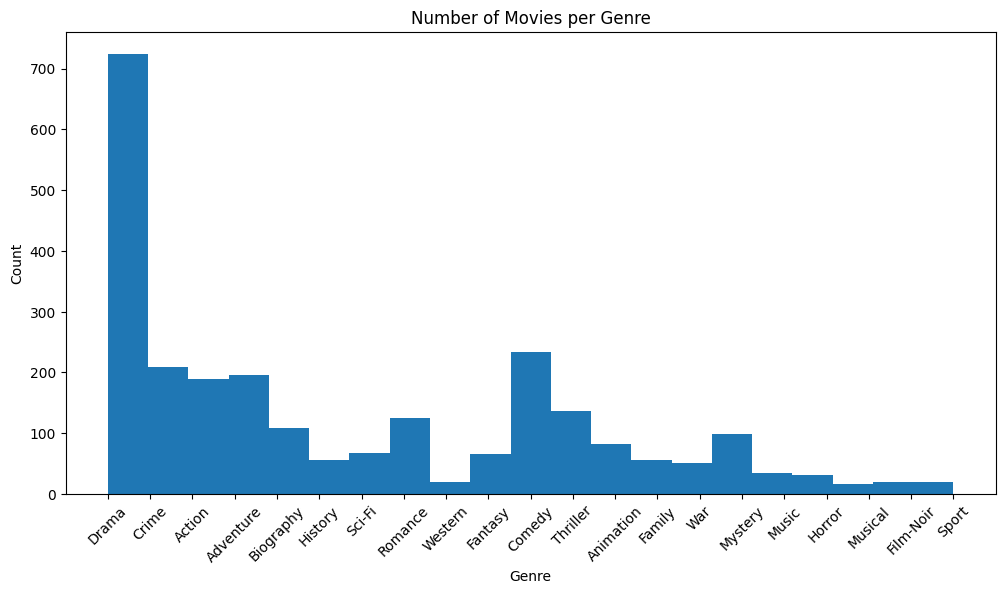

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(all_genres, bins=len(unique_genre))

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45, ha='center')

plt.show()



The below code generates a scatter plot to visualize the number of movies released each year in the IMDb Top 1000 movies dataset. The plot shows the relationship between the years on the x-axis and the corresponding number of movies on the y-axis. The x-axis labels are rotated by 90 degrees for better readability.

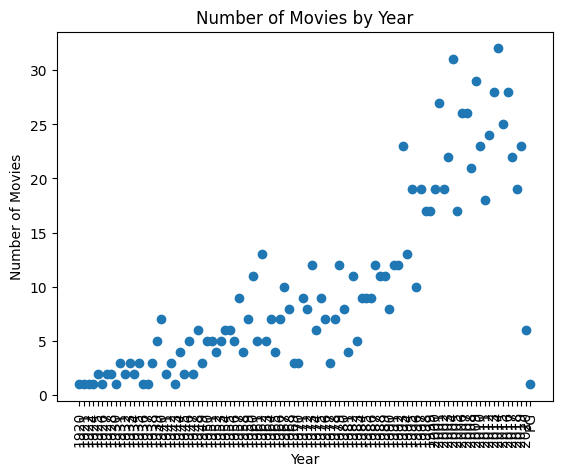

In [5]:
year_counts = df.groupby('Released_Year').size().reset_index(name='Series_Title')
years = year_counts['Released_Year']
movies = year_counts['Series_Title']

plt.scatter(years, movies)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year')
plt.xticks(rotation=90, ha='center')

plt.show()